# Home Credit Default Risk Project by Digital Hero

## Load the data!

In [1]:
#Import library for loading our data!
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Load the training data!
df_train = pd.read_csv('/content/gdrive/My Drive/application_train.csv')

df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Cek the structure of our training data!
df_train.shape

(307511, 122)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#Load testing data!
df_test = pd.read_csv('/content/gdrive/My Drive/application_test.csv')

df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Check the structure of the testing data!
df_test.shape

(48744, 121)

In [66]:
#check if there is a data duplicate?
df_train.duplicated().sum()

0

In [67]:
df_test.duplicated().sum()

0

## Exploratory Data Analysis!

In [8]:
#Simple statistics for our numerical variables in training data!
simple_stats = df_train.describe(include = 'all').transpose()
simple_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511,NaN,NaN,NaN,278181,102790,100002,189146,278202,367142,456255
TARGET,307511,NaN,NaN,NaN,0.0807288,0.272419,0,0,0,0,1
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992,NaN,NaN,NaN,0.00700021,0.110757,0,0,0,0,9
AMT_REQ_CREDIT_BUREAU_WEEK,265992,NaN,NaN,NaN,0.0343619,0.204685,0,0,0,0,8
AMT_REQ_CREDIT_BUREAU_MON,265992,NaN,NaN,NaN,0.267395,0.916002,0,0,0,0,27
AMT_REQ_CREDIT_BUREAU_QRT,265992,NaN,NaN,NaN,0.265474,0.794056,0,0,0,0,261


Notice that not all features have the same count! It indicates that there some of them have missing values!

In [9]:
#For the testing data!
df_test.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,48744,NaN,NaN,NaN,277797,103170,100001,188558,277549,367556,456250
NAME_CONTRACT_TYPE,48744,2,Cash loans,48305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,48744,2,F,32678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,48744,2,N,32311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,48744,2,Y,33658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,42695,NaN,NaN,NaN,0.00180349,0.0461324,0,0,0,0,2
AMT_REQ_CREDIT_BUREAU_WEEK,42695,NaN,NaN,NaN,0.00278721,0.0540374,0,0,0,0,2
AMT_REQ_CREDIT_BUREAU_MON,42695,NaN,NaN,NaN,0.00929851,0.110924,0,0,0,0,6
AMT_REQ_CREDIT_BUREAU_QRT,42695,NaN,NaN,NaN,0.546902,0.693305,0,0,0,1,7


From the output above, we can say exactly the same compared to our interpretation toward the training data!

### Check missing data!

In [10]:
#Let's check whether our training data contains missing values or not!
total_missing_values = df_train.isnull().sum().sort_values(ascending = False)
total_non_missing_values = df_train.count().sort_values(ascending = False)
percent_missing_values = total_missing_values/(total_non_missing_values+total_missing_values)*100
df_train_missing = pd.concat([total_missing_values, total_non_missing_values, percent_missing_values], axis = 1, keys = ['Total Missing Values',
                                                                                                                        'Total Non Missing Values',
                                                                                                                        'Percentage of Missing Values'])
df_train_missing.head(20)

,Total Missing Values,Total Non Missing Values,Percentage of Missing Values
COMMONAREA_MEDI,214865,92646,69.872297
COMMONAREA_AVG,214865,92646,69.872297
COMMONAREA_MODE,214865,92646,69.872297
NONLIVINGAPARTMENTS_MODE,213514,93997,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,93997,69.432963
NONLIVINGAPARTMENTS_AVG,213514,93997,69.432963
FONDKAPREMONT_MODE,210295,97216,68.386172
LIVINGAPARTMENTS_MEDI,210199,97312,68.354953
LIVINGAPARTMENTS_MODE,210199,97312,68.354953
LIVINGAPARTMENTS_AVG,210199,97312,68.354953


### Plot 1 : Distribution of Loan Status!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


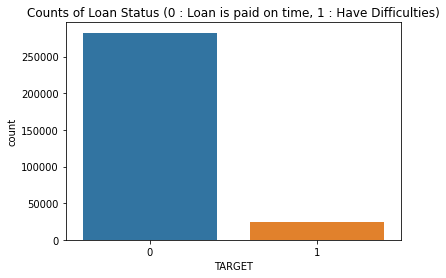

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df_train['TARGET'])
plt.title('Counts of Loan Status (0 : Loan is paid on time, 1 : Have Difficulties)')
plt.show()

Notice that the number of 0s is much higher than the number of 1s (The number of Loans that are repaid on time is much more than the loans that are not repaid). That means we face an "Imbalanced Class Problem" in Classification!

### Plot 2 : Distribution of the Amount of Credit!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


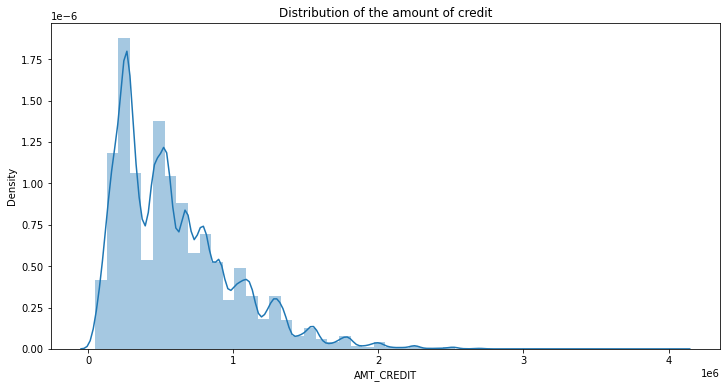

In [12]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_train['AMT_CREDIT'], ax = ax)
ax.set_title('Distribution of the amount of credit')
plt.show()

In [13]:
#Check which columns in DataFrame are Categorical

df_train.select_dtypes(exclude=["number","bool_"]).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [14]:
#Get the number of categorical columns

len(df_train.select_dtypes(exclude=["number","bool_"]).columns)

16

### Plot 3 : Categorical Count Charts (Part 1)

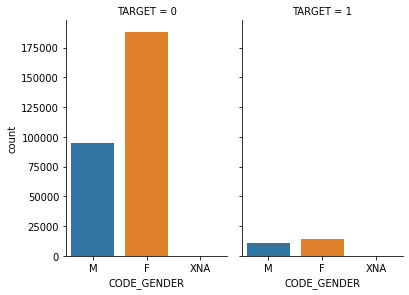

In [15]:
g = sns.catplot(x="CODE_GENDER", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=.7)

plt.show()

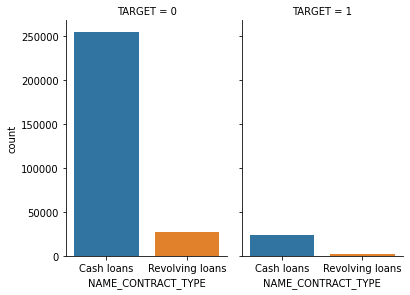

In [16]:
g = sns.catplot(x="NAME_CONTRACT_TYPE", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=.7)


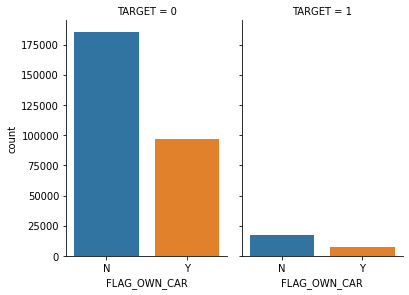

In [17]:
g = sns.catplot(x="FLAG_OWN_CAR", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=.7)


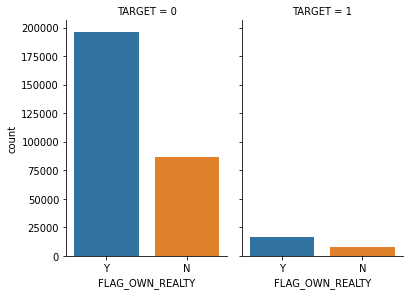

In [18]:
g = sns.catplot(x="FLAG_OWN_REALTY", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=.7)

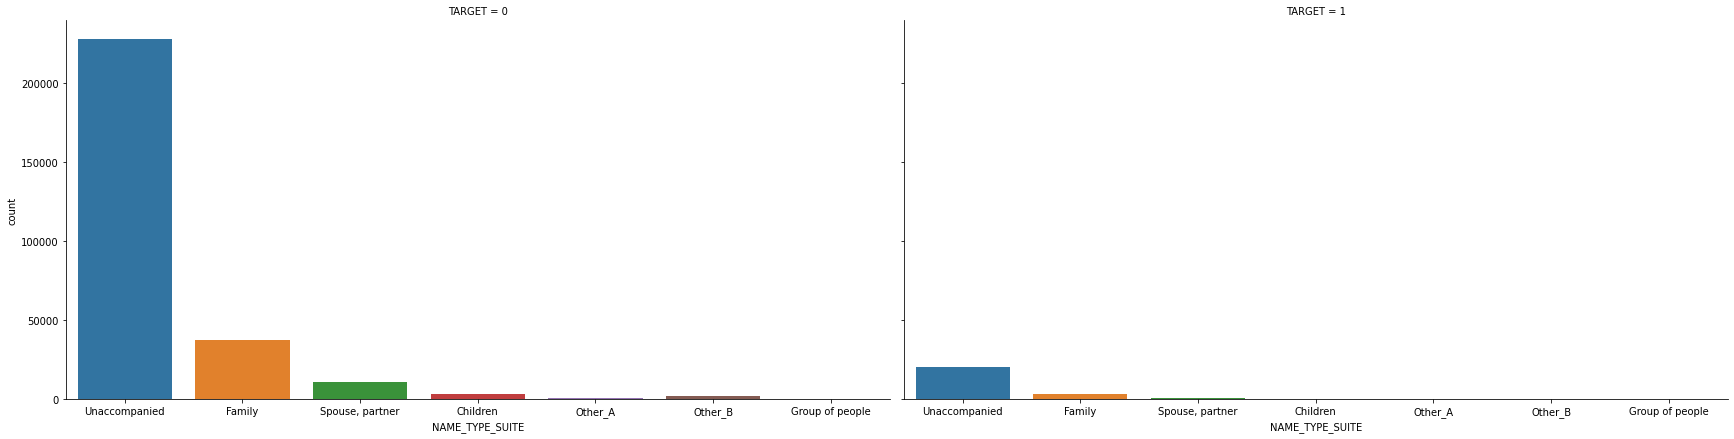

In [19]:
g = sns.catplot(x="NAME_TYPE_SUITE", col="TARGET",
                data=df_train, kind="count",
                height=6, aspect=2)

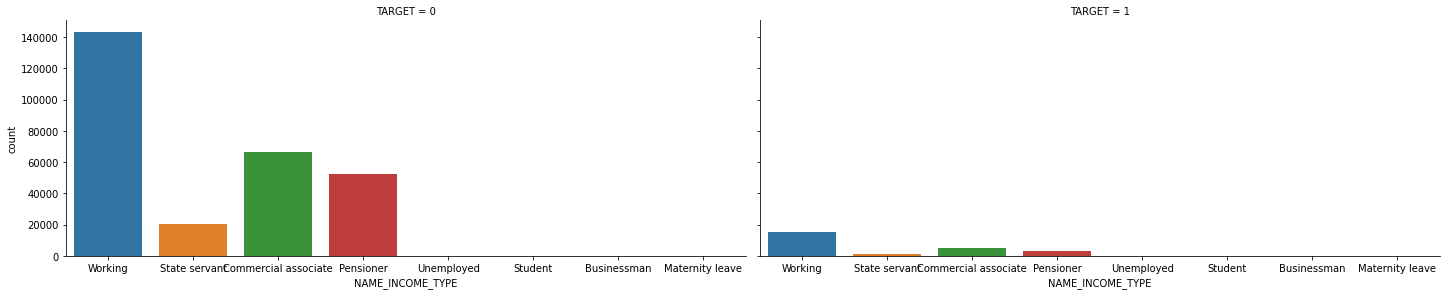

In [20]:
g = sns.catplot(x="NAME_INCOME_TYPE", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=2.5)

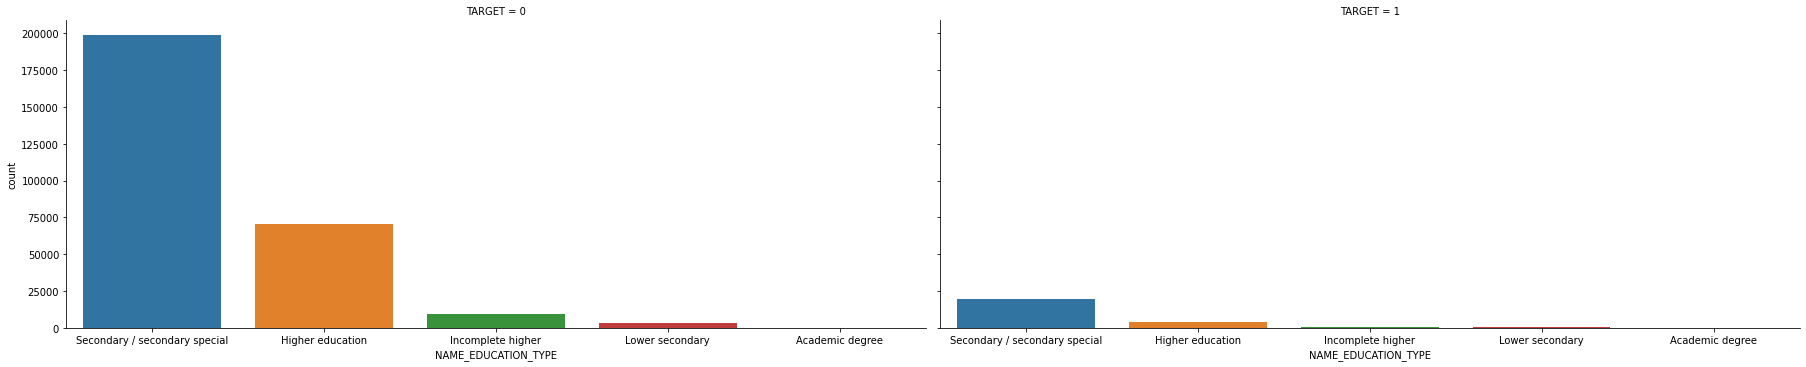

In [21]:
g = sns.catplot(x="NAME_EDUCATION_TYPE", col="TARGET",
                data=df_train, kind="count",
                height=5, aspect=2.5)

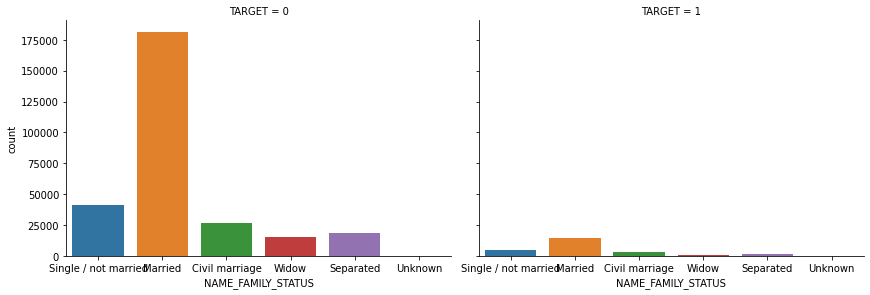

In [22]:
g = sns.catplot(x="NAME_FAMILY_STATUS", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


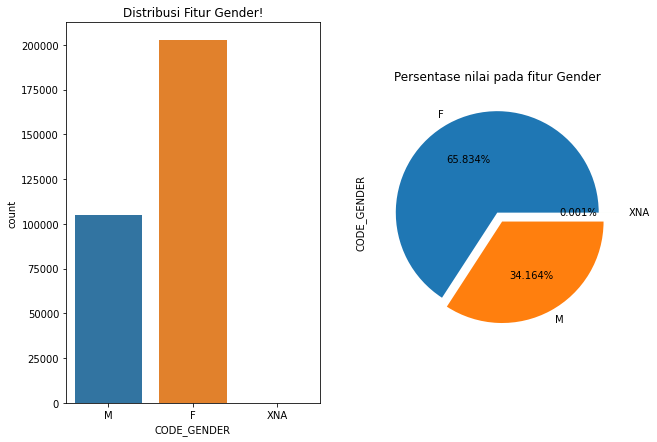

In [23]:
#Plot distribusi fitur Gender.
plt.subplot(1, 2, 1)
sns.countplot(df_train['CODE_GENDER'])
plt.title("Distribusi Fitur Gender!")

plt.subplot(1,2,2)
count = df_train['CODE_GENDER'].value_counts()
count.plot.pie(autopct = '%1.3f%%', figsize = (10,7),explode = [0,0.1,0.2],title = "Persentase nilai pada fitur Gender")

plt.show()

### Plot 4 : Categorical Count Charts (Part 2)

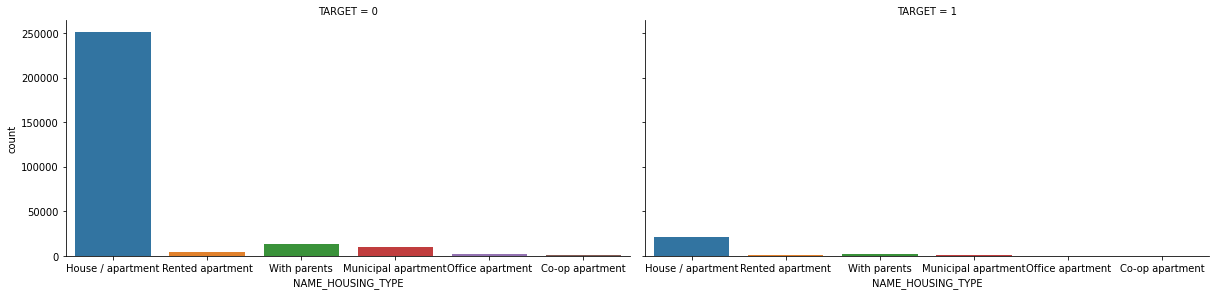

In [24]:
g = sns.catplot(x="NAME_HOUSING_TYPE", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=2.1)

plt.show()

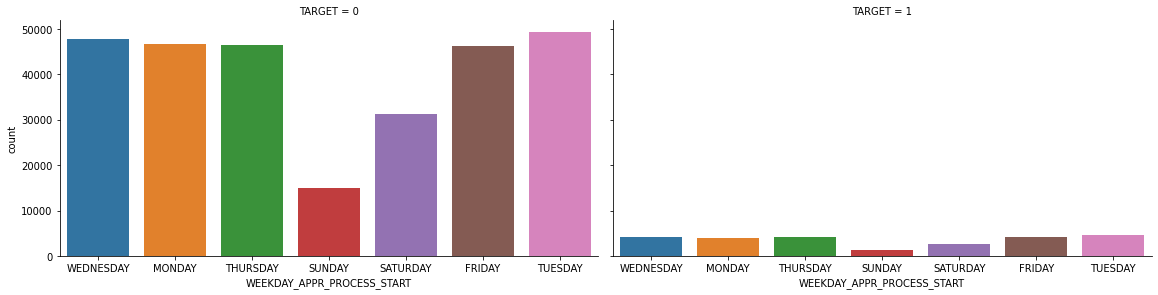

In [25]:
g = sns.catplot(x="WEEKDAY_APPR_PROCESS_START", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=2)

plt.show()

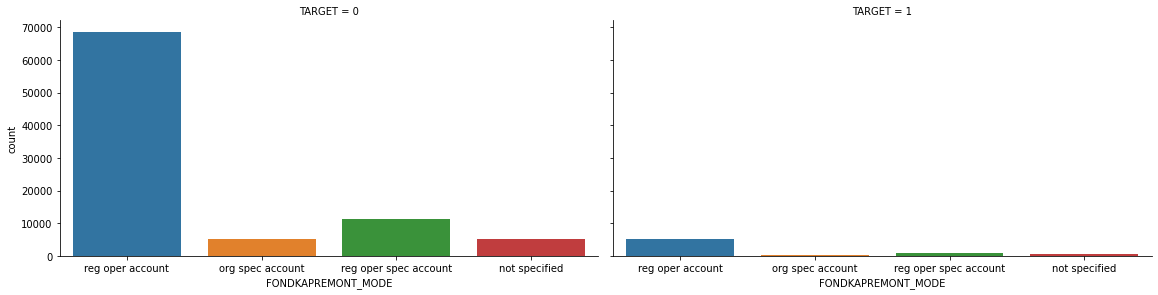

In [26]:
g = sns.catplot(x="FONDKAPREMONT_MODE", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=2)

plt.show()

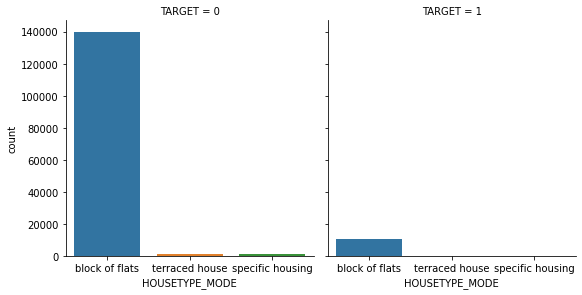

In [27]:
g = sns.catplot(x="HOUSETYPE_MODE", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=1)

plt.show()

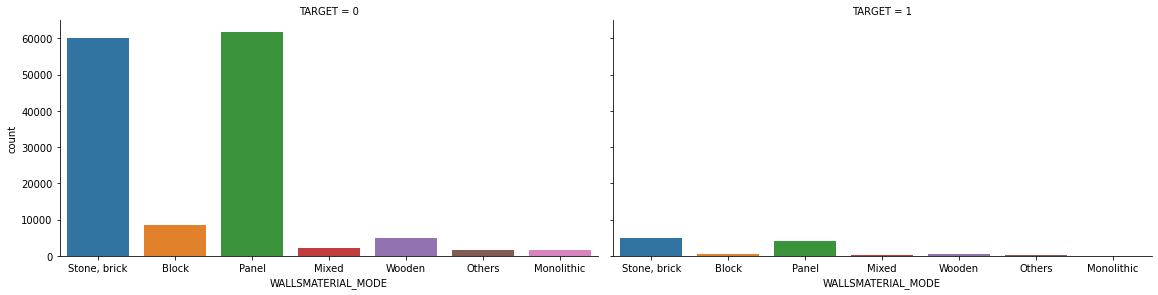

In [28]:
g = sns.catplot(x="WALLSMATERIAL_MODE", col="TARGET",
                data=df_train, kind="count",
                height=4, aspect=2)

plt.show()

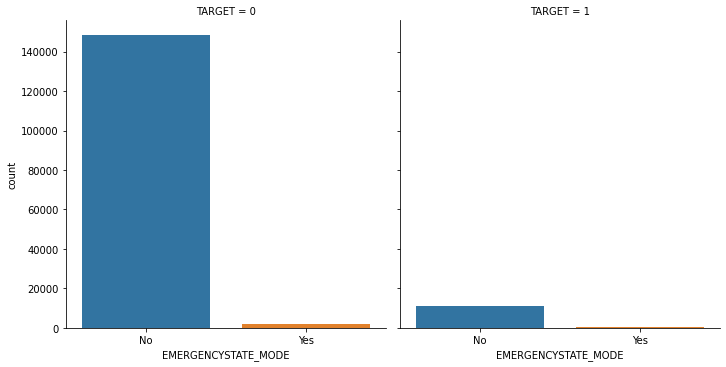

In [29]:
g = sns.catplot(x="EMERGENCYSTATE_MODE", col="TARGET",
                data=df_train, kind="count",
                height=5, aspect=1)

plt.show()

### Handling Anomalies!

In [30]:
#Let's take a look to numerical variables in our training data
import numpy as np

df_train.describe(include = [np.number])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

Notice that 'DAYS_BIRTH' and 'DAYS_EMPLOYED' column's mean are negative! To fix this, we have to take the absolute value of the columns original values!

In [31]:
#Absolute value of 'DAYS-BIRTH' column!
df_train['DAYS_BIRTH'] = np.abs(df_train['DAYS_BIRTH'])
(df_train['DAYS_BIRTH']).describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [32]:
#Absolute value of 'DAYS_EMPLOYED column!
df_train['DAYS_EMPLOYED'] = np.abs(df_train['DAYS_EMPLOYED'])
(df_train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Also notice that the 'DAYS_EMPLOYED' column is very strange because its max value is 365243 days! It means 1000 years!!! IT IS IMPOSSIBLE! We guess that this can happen by an accident, such as typo, inputting the wrong value, etc

To handle these anomalous variables, we will first replace strange/imposibble values with NaNs! We also want to create new columns for those replaced values!

In [33]:
#Create new column for strange value!
df_train['ANOM_DAYS_EMPLOYED'] = df_train[df_train['DAYS_EMPLOYED'] == 365243].DAYS_EMPLOYED

#Replace those strange values with NaNs!
df_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)

In [34]:
#Also apply this method to our testing data!
df_test['ANOM_DAYS_EMPLOYED'] = df_test[df_test['DAYS_EMPLOYED'] == 365243].DAYS_EMPLOYED

#Replace those strange values with NaNs in our testing dataset!
df_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)

In [35]:
#Calculate correlations of our target variable to another variables!
corr1 = df_train.corr().TARGET.sort_values()

print('The most positive correlations:\n', corr1.tail())
print('\nThe most negative correlations:\n', corr1.head())

The most positive correlations:
 DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
ANOM_DAYS_EMPLOYED                  NaN
Name: TARGET, dtype: float64

The most negative correlations:
 EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_BIRTH      -0.078239
DAYS_EMPLOYED   -0.074958
Name: TARGET, dtype: float64


###Plot 5: Age Distribution

In [36]:
age = pd.DataFrame(df_train[['DAYS_BIRTH', 'TARGET']])
age['Age_Years'] = age['DAYS_BIRTH']/365
age.head()

,DAYS_BIRTH,TARGET,Age_Years
0,9461,1,25.920548
1,16765,0,45.931507
2,19046,0,52.180822
3,19005,0,52.068493
4,19932,0,54.608219


In [37]:
age['Age_Years'].max()

69.12054794520547

In [38]:
#Create bin
age['Age_Bins'] = pd.cut(x=age['Age_Years'], bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
age.head()

,DAYS_BIRTH,TARGET,Age_Years,Age_Bins
0,9461,1,25.920548,"(25, 30]"
1,16765,0,45.931507,"(45, 50]"
2,19046,0,52.180822,"(50, 55]"
3,19005,0,52.068493,"(50, 55]"
4,19932,0,54.608219,"(50, 55]"


In [39]:
Groups = age.groupby('Age_Bins').mean()
Groups

,DAYS_BIRTH,TARGET,Age_Years
Age_Bins,,,
"(20, 25]",8532.795625,0.123036,23.377522
"(25, 30]",10155.219250,0.111436,27.822518
"(30, 35]",11854.848377,0.102814,32.479037
"(35, 40]",13707.908253,0.089414,37.555913
"(40, 45]",15497.661233,0.078491,42.459346
"(45, 50]",17323.900441,0.074171,47.462741
"(50, 55]",19196.494791,0.066968,52.593136
"(55, 60]",20984.262742,0.055314,57.491131
"(60, 65]",22780.547460,0.052737,62.412459


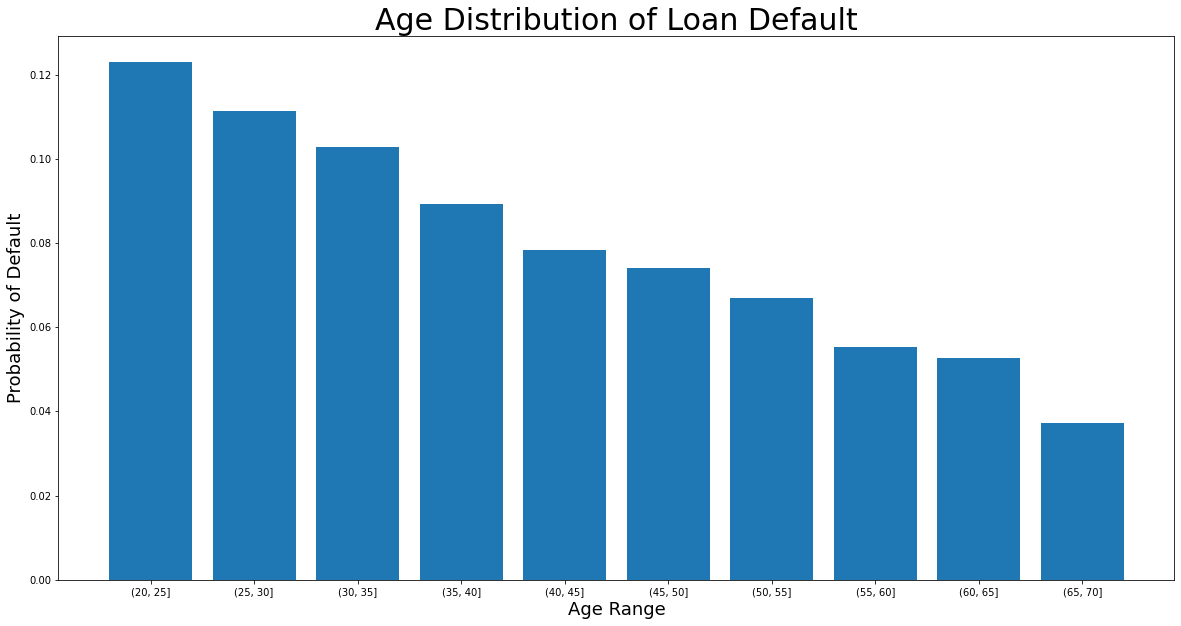

In [40]:
plt.figure(figsize=(20, 10))
plt.bar(Groups.index.astype(str), Groups['TARGET'])

plt.title('Age Distribution of Loan Default', fontsize= 30)
plt.xlabel('Age Range', fontsize= 18)
plt.ylabel('Probability of Default', fontsize= 18)
plt.show()


There is a clear correlation between the age and the probability of default.

### Check for the types of our data's columns!

In [41]:
df_train.dtypes.value_counts()

float64    67
int64      40
object     16
dtype: int64

Recall that "float64" data type shows that the column is filled with decimal number and "int64" type column is filled with integer. Both of them are numerical variables. Then,  "object" data type column is filled with string or categorical variables.

For the categorical variables columns, we need to know how many unique classes in each of them!

In [42]:
#Count of unique classes in each categorical variable column!
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Convert categorical variables to numerical variables using One Hot Encoding!

In [43]:
#Using One Hot Encoding!
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [44]:
#Check the structure of our new training and testing data!
print('Our new training data shape {}'.format(df_train.shape))
print('Our new testing data shape {}'.format(df_test.shape))

Our new training data shape (307511, 247)
Our new testing data shape (48744, 243)


We get a problem! Recall that our future machine learning model cannot handle the data where its training is different to our testing data in terms of the number of features! 

This is because there are some variables/columns that exist in our training data, but they don't exist in our testing data!

### Equalizing the number of independent variables in our training and testing data!

In [45]:
#Assign the target variable to new variable called "target_train"
target_train = df_train['TARGET']

#Equalizing the number of features in our training and testing data using inner join method!
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

In [46]:
#Insert again our target variable in training data!
df_train['TARGET'] = target_train

In [47]:
#Let's take a look to the shape of our new training and testing data!
print('Our new again training data shape {}'.format(df_train.shape))
print('Our new again testing data shape {}'.format(df_test.shape))

Our new again training data shape (307511, 244)
Our new again testing data shape (48744, 243)


### Plot 4 : Heatmap for the most negative correlations!

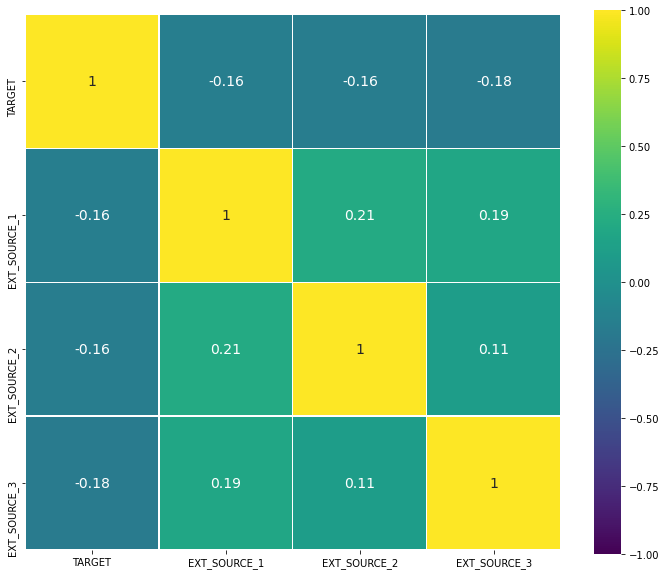

In [48]:
#3 variables with the strongest negative correlations with the target
external_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
corr2 = external_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.05) | (corr2 <= -0.04)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True)

Notice that all exterior variables have negative correlations to our target variable So, it's more likely for people to repay the loans on time when the value of exterior variables increase!

### Plot 5 : Heatmap for the most positive correlations!

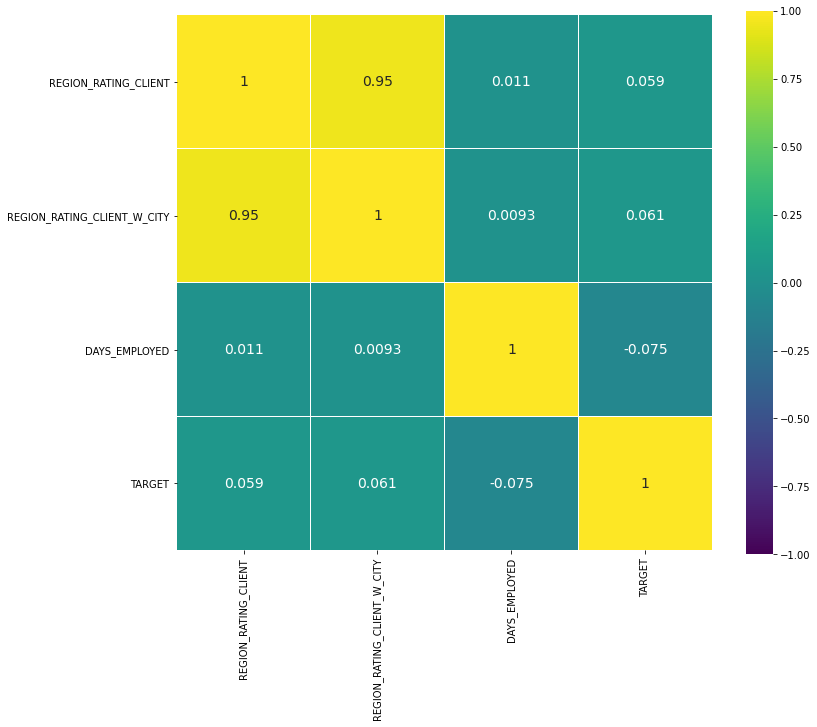

In [49]:
#3 variables with the strongest positive correlations with the target
positive = df_train[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED', 'TARGET']]
corr3 = positive.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr3[(corr3 >= 0.00000005) | (corr3 <= -0.00000004)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True)

Also see that 'REGION_RATING_CLIENT_W_CITY' and 'REGION_RATING_CLIENT' are having a strong correlation to each other, it means that our rating of the region is correlated with the cities where our clients live.

## More in Feature Engineering by creating new features!

In [50]:
#New feature no.1 : The Amount of Credit / Total Income of Client
df_train['CREDIT_RELATIVE_W_INCOME'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
df_test['CREDIT_RELATIVE_W_INCOME'] = df_test['AMT_CREDIT'] / df_test['AMT_INCOME_TOTAL']

#New feature no.2 : The Amount of Annuity / Total Income of Client
df_train['ANNUITY_RELATIVE_W_INCOME'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']
df_test['ANNUITY_RELATIVE_W_INCOME'] = df_test['AMT_ANNUITY'] / df_test['AMT_INCOME_TOTAL']

#New feature no.3 : The Amount of Annuity / The Amount of Credit
df_train['LEN_PAYMENT'] = df_train['AMT_ANNUITY'] / df_train['AMT_CREDIT']
df_test['LEN_PAYMENT'] = df_test['AMT_ANNUITY'] / df_test['AMT_CREDIT']

#New feature no.4 : The Amount of Income / Count of Family Members
df_train['INCOME_PER_FAMILY'] = df_train['AMT_INCOME_TOTAL']/ df_train['CNT_FAM_MEMBERS']
df_test['INCOME_PER_FAMILY'] = df_test['AMT_INCOME_TOTAL'] / df_test['CNT_FAM_MEMBERS']

## Data Scaling!

We will use normalization since we don't know what kind of distribution our data has!

First, we fill the missing values

In [51]:
#Split the data
X = df_train.drop('TARGET', axis = 1)
y = df_train['TARGET']
df_test_copy = df_test.copy()

#Imputing missing values with median!
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(X)

X = imp_mean.transform(X)
df_test_copy = imp_mean.transform(df_test)


In [52]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Then, we will try and compare two different method of normalization; MinMax Scaler and StandardScaler

In [53]:
#StandardScaler normalization
from sklearn.preprocessing import StandardScaler
scaler_stan = StandardScaler()
scaler_stan.fit(X_train)

scaler_stan.transform(X_train)
scaler_stan.transform(X_test)

array([[ 1.03381303,  2.19765507,  0.3687094 , ...,  0.77538775,
         2.64291559, -0.56330486],
       [-0.6248456 , -0.57756555,  0.75615912, ...,  0.17801738,
        -0.68909312,  2.11252384],
       [-1.32285047, -0.57756555,  0.32565943, ...,  0.12909677,
         1.12669653,  0.11334148],
       ...,
       [ 0.76537805, -0.57756555, -0.44924002, ...,  0.72834573,
         2.91390461, -0.44027825],
       [ 0.41150364,  0.81004476, -0.53533995, ...,  1.70910426,
        -1.0828452 , -0.75809699],
       [ 1.11338858, -0.57756555, -0.10484026, ..., -0.07184544,
        -0.04772058,  0.88225777]])

#Balancing

As we have imbalanced data, to make our model better in predicting the target label, we will use over-sampling by SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [55]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#Modelling

In [56]:
#LGBM
import lightgbm as lgbm
lgbm_train = lgbm.Dataset(data=X,
                          label=y,
                          free_raw_data=False)
lgbm_params = {
    'boosting': 'dart',
    'application': 'binary',
    'learning_rate': 0.1,
    'min_data_in_leaf': 30,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.5,
    'scale_pos_weight': 2,
    'drop_rate': 0.02
}

cv_results = lgbm.cv(train_set=lgbm_train,
                     params=lgbm_params,
                     nfold=5,
                     num_boost_round=600,
                     early_stopping_rounds=50,
                     verbose_eval=20,
                     metrics=['auc'])

optimum_boost_rounds = np.argmax(cv_results['auc-mean'])
print('Optimum boost rounds = {}'.format(optimum_boost_rounds))
print('Best CV result = {}'.format(np.max(cv_results['auc-mean'])))

clf = lgbm.train(train_set=lgbm_train,
                 params=lgbm_params,
                 num_boost_round=optimum_boost_rounds)

y_test_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[20]	cv_agg's auc: 0.75094 + 0.00294924
[40]	cv_agg's auc: 0.757977 + 0.00308629
[60]	cv_agg's auc: 0.760556 + 0.00351047
[80]	cv_agg's auc: 0.762746 + 0.00299944
[100]	cv_agg's auc: 0.763911 + 0.00294759
[120]	cv_agg's auc: 0.7639 + 0.00272315
[140]	cv_agg's auc: 0.764001 + 0.00263143
[160]	cv_agg's auc: 0.764083 + 0.00267973
[180]	cv_agg's auc: 0.764602 + 0.00262968
[200]	cv_agg's auc: 0.765225 + 0.00252891
[220]	cv_agg's auc: 0.765847 + 0.00284058
[240]	cv_agg's auc: 0.766124 + 0.00287662
[260]	cv_agg's auc: 0.766591 + 0.00292235
[280]	cv_agg's auc: 0.766853 + 0.00289872
[300]	cv_agg's auc: 0.767245 + 0.00290696
[320]	cv_agg's auc: 0.76722 + 0.00309014
[340]	cv_agg's auc: 0.76709 + 0.00317366
[360]	cv_agg's auc: 0.767452 + 0.00313336
[380]	cv_agg's auc: 0.767536 + 0.0029968
[400]	cv_agg's auc: 0.767492 + 0.00300532
[420]	cv_agg's auc: 0.767554 + 0.00305754
[440]	cv_agg's auc: 0.767466 + 0.00312654
[460]	cv_agg's auc: 0.767363 + 0.00315427
[480]	cv_agg's auc: 0.76726 + 0.00310547
[50

## Model Interpretation: Feature Importances!

In [57]:
df_train.drop('TARGET', axis=1, inplace=True)

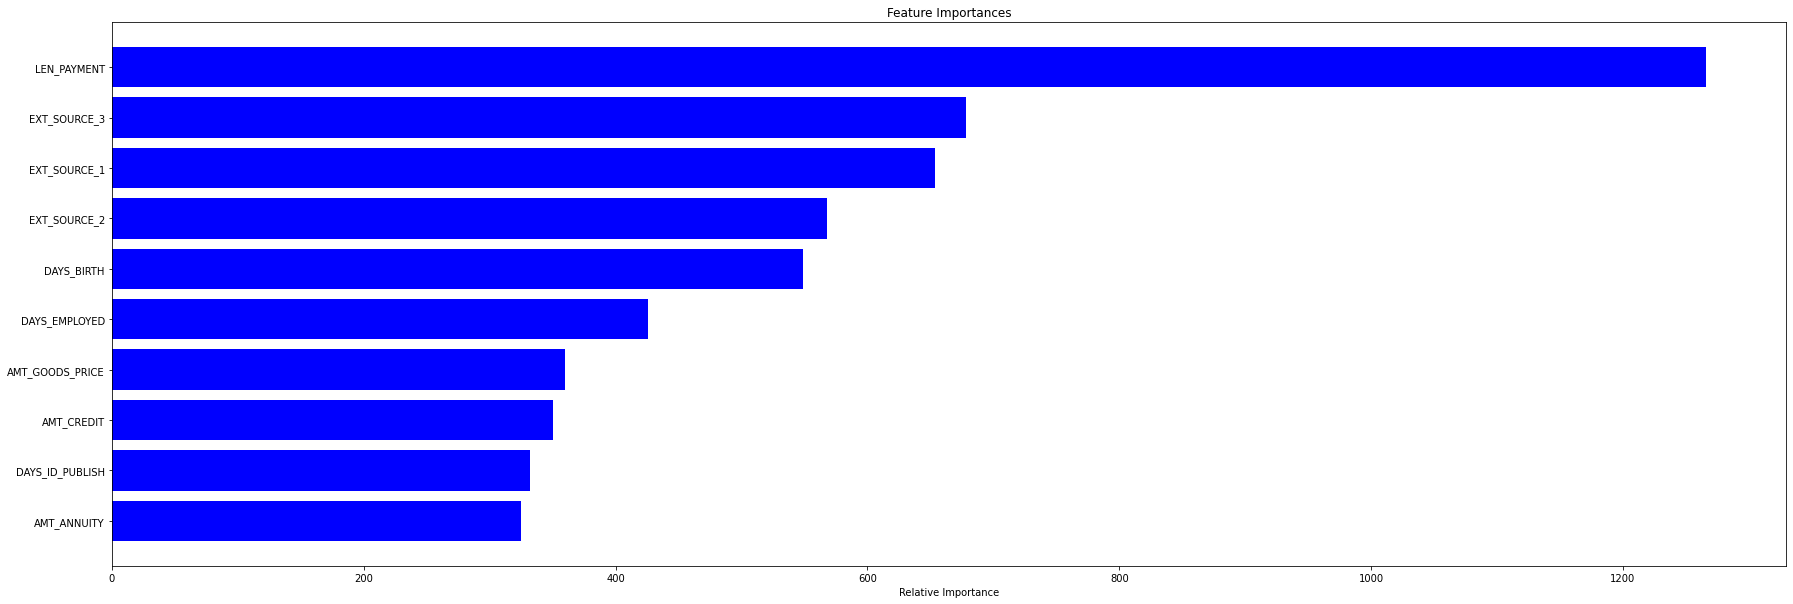

In [58]:
features = df_train.columns
importances = clf.feature_importance()
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(30,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [59]:
test_id = df_test['SK_ID_CURR']
predict = clf.predict(df_test_copy)
submission_lgbm = pd.DataFrame({'SK_ID_CURR':test_id,'Target':predict})

#Visualize the first 5 rows
submission_lgbm.head()

,SK_ID_CURR,Target
0,100001,0.065751
1,100005,0.175772
2,100013,0.050235
3,100028,0.057385
4,100038,0.224326


In [60]:
# Save the submission dataframe
submission_lgbm.to_csv('/content/gdrive/My Drive/submisi_lgbm.csv', index = False)

#Model after feature selection

In [61]:
df_train2 = df_train[['LEN_PAYMENT','EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY']]

In [62]:
#LGBM
import lightgbm as lgbm
lgbm_train = lgbm.Dataset(data=df_train2,
                          label=y,
                          free_raw_data=False)
lgbm_params = {
    'boosting': 'dart',
    'application': 'binary',
    'learning_rate': 0.1,
    'min_data_in_leaf': 30,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.5,
    'scale_pos_weight': 2,
    'drop_rate': 0.02
}

cv_results = lgbm.cv(train_set=lgbm_train,
                     params=lgbm_params,
                     nfold=5,
                     num_boost_round=600,
                     early_stopping_rounds=50,
                     verbose_eval=20,
                     metrics=['auc'])

optimum_boost_rounds = np.argmax(cv_results['auc-mean'])
print('Optimum boost rounds = {}'.format(optimum_boost_rounds))
print('Best CV result = {}'.format(np.max(cv_results['auc-mean'])))

clf = lgbm.train(train_set=lgbm_train,
                 params=lgbm_params,
                 num_boost_round=optimum_boost_rounds)

y_test_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[20]	cv_agg's auc: 0.746582 + 0.00278179
[40]	cv_agg's auc: 0.752078 + 0.00308582
[60]	cv_agg's auc: 0.755172 + 0.00291269
[80]	cv_agg's auc: 0.756636 + 0.00287155
[100]	cv_agg's auc: 0.757303 + 0.00288241
[120]	cv_agg's auc: 0.757087 + 0.00284929
[140]	cv_agg's auc: 0.756989 + 0.00292581
[160]	cv_agg's auc: 0.757154 + 0.00299446
[180]	cv_agg's auc: 0.757465 + 0.00303363
[200]	cv_agg's auc: 0.757838 + 0.00304258
[220]	cv_agg's auc: 0.758384 + 0.00293939
[240]	cv_agg's auc: 0.758628 + 0.00301422
[260]	cv_agg's auc: 0.758926 + 0.00297794
[280]	cv_agg's auc: 0.759207 + 0.00292904
[300]	cv_agg's auc: 0.759313 + 0.00289787
[320]	cv_agg's auc: 0.759196 + 0.00287347
[340]	cv_agg's auc: 0.759385 + 0.00309384
[360]	cv_agg's auc: 0.759555 + 0.00312354
[380]	cv_agg's auc: 0.759689 + 0.00310817
[400]	cv_agg's auc: 0.759639 + 0.00308704
[420]	cv_agg's auc: 0.759517 + 0.00305619
[440]	cv_agg's auc: 0.759479 + 0.00310155
[460]	cv_agg's auc: 0.759544 + 0.00307764
[480]	cv_agg's auc: 0.759353 + 0.00312

In [63]:
test_id = df_test['SK_ID_CURR']
predict = clf.predict(df_test_copy)
submission_lgbm = pd.DataFrame({'SK_ID_CURR':test_id,'Target':predict})

#Visualize the first 5 rows
submission_lgbm.head()

,SK_ID_CURR,Target
0,100001,0.023905
1,100005,0.018916
2,100013,0.015395
3,100028,0.006752
4,100038,0.006925


In [64]:
# Save the submission dataframe
submission_lgbm.to_csv('/content/gdrive/My Drive/submisi(afterFS)_lgbm.csv', index = False)